# Numerical Analysis - IMPA 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def euler_f(t, u, f):
    if not isinstance(u, (list, tuple, np.ndarray)):
        return u + t*f(t, u)
    elif len(u) != len(t):
        raise ValueError("*u* and *t* must have same number of samples")
    dt = t[1] - t[0]
    for n in range(len(t)-1):
        u[n+1] = u[n] + dt*f(t[n], u[n])
    return u

def euler_pc(t, u, f):
    if len(u) != len(t):
        raise ValueError("*u* and *t* must have same number of samples")
    dt = t[1] - t[0]
    for n in range(len(t)-1):
        # predictor
        u[n+1] = u[n] + dt*f(t[n], u[n])
        # corrector
        u[n+1] = u[n] + dt*f(t[n+1], u[n+1])
    return u


In [27]:
def easy_f(t, u):
    return 0.1*u
def solution(t, u0):
    return u0*np.exp(0.1*t)

In [29]:
# let's think of time in minutes
initial_condition = 100
total_time = 90
dt = 0.5
n_samples = int(total_time/dt) + 1
# time (independent variable) discretization
t = np.linspace(0, total_time, n_samples)
# estimated function discretization
u_f = np.zeros(n_samples)
u_pc = np.zeros(n_samples)

u_f[0] = initial_condition
u_pc[0] = initial_condition

u_f = euler_f(t, u_f, easy_f)
u_pc = euler_pc(t, u_pc, easy_f)

ground_truth = solution(t, initial_condition)

In [30]:
def MSE(gt, est):
    e = np.zeros(len(est))
    cumulative = 0
    for n in range(len(est)):
        cumulative += (gt[n]-est[n])**2
        e[n] = (cumulative)/(n+1)
    
    return e

# def error(gt, est):
#     e = 0
#     for n in range(len(est)):
#         e += abs(gt[n]-est[n])

#     return e

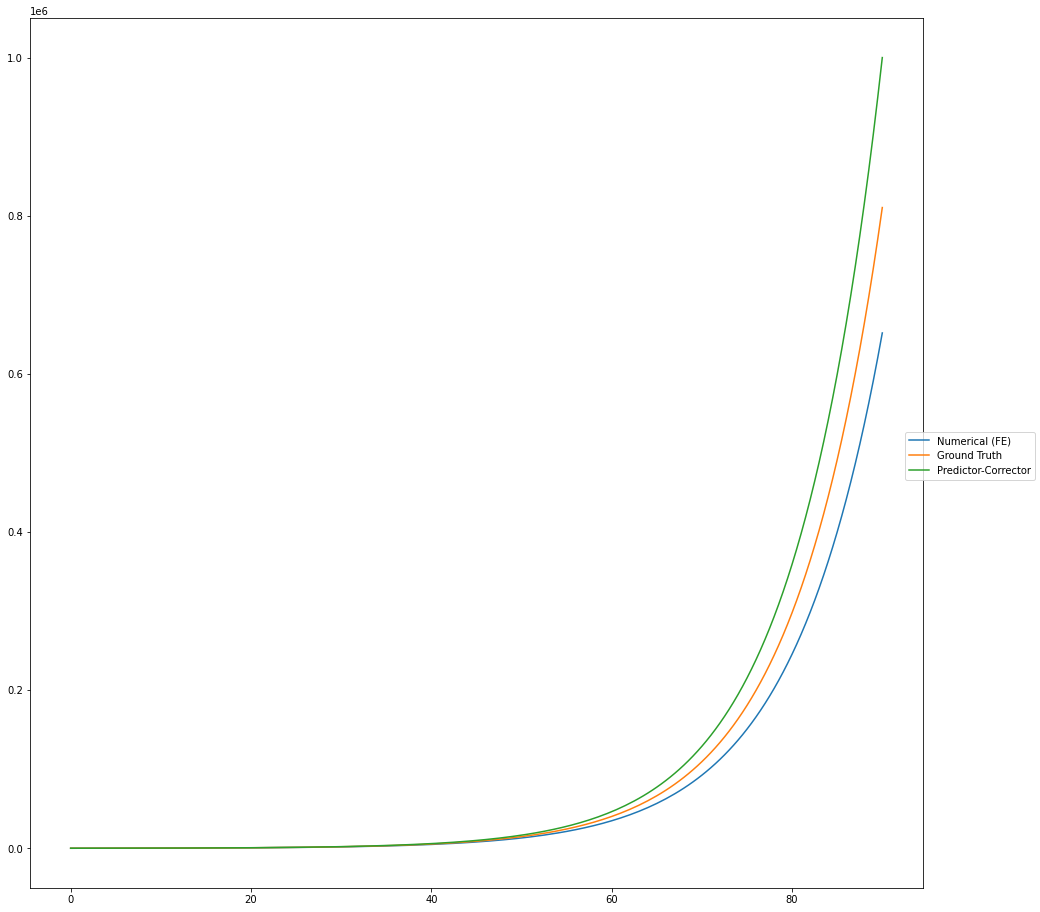

In [31]:
fig = plt.figure(figsize=(16, 16))
l1, l2, l3 = plt.plot(t, u_f, t, ground_truth, t, u_pc) 
fig.legend((l1, l2, l3), ('Numerical (FE)', 'Ground Truth', 'Predictor-Corrector'), 'center right') 

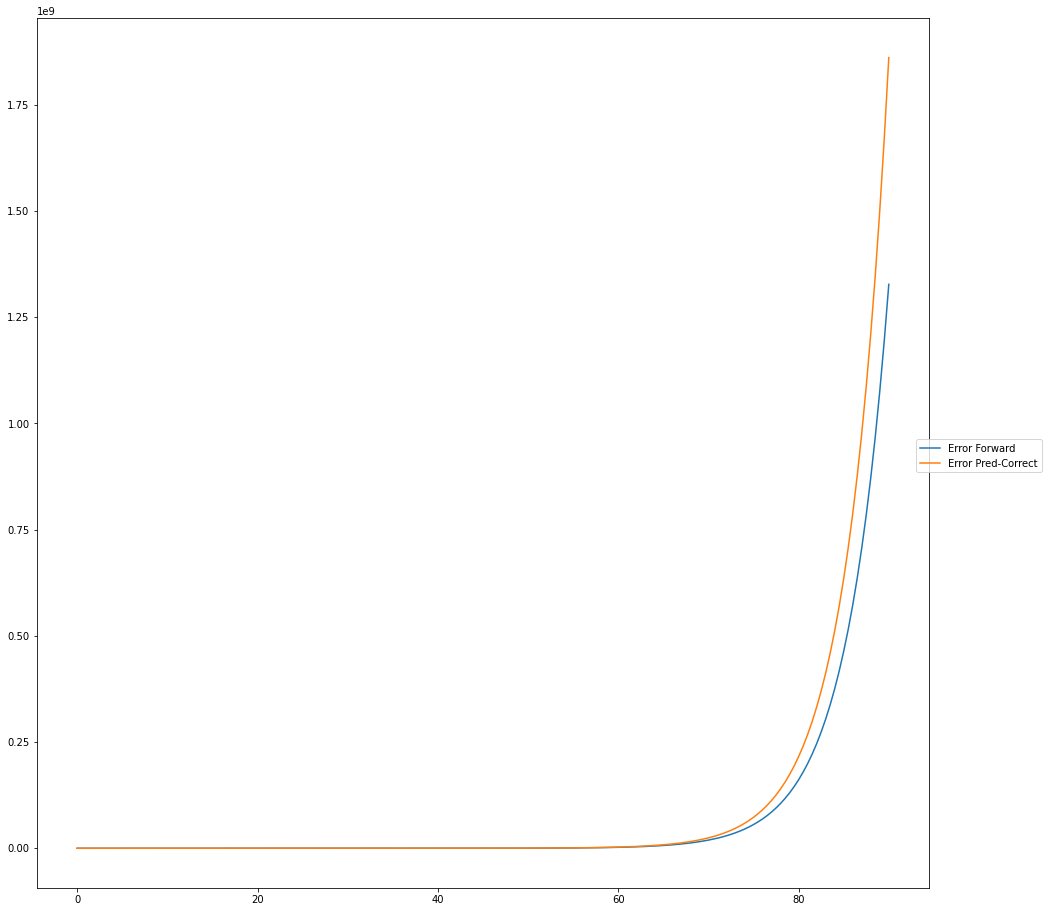

In [35]:
e_f = MSE(ground_truth, u_f)
e_pc = MSE(ground_truth, u_pc)
fig = plt.figure(figsize=(16, 16))
l4, l5 = plt.plot(t, e_f, t, e_pc) 
fig.legend((l4, l5), ('Error Forward', 'Error Pred-Correct'), 'center right') 